In [56]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import urllib.request

import time
from scipy.stats import linregress

In [57]:
ar_data_import = "../CA_Water_Analysis/Ar-Water-Lab-Data.csv"
ar_data = pd.read_csv(ar_data_import)
ar_data.head()

,station_id,station_name,full_station_name,station_number,station_type,latitude,longitude,status,county_name,sample_code,sample_date,sample_depth,sample_depth_units,parameter,result,reporting_limit,units,method_name
0,25391,09S13E20E001S,09S13E20E001S,09S13E20E001S,Groundwater,33.3798,115.6387,Review Status Unknown,Imperial,WDIS_0005418,5/11/37 9:00,NaN,Feet,Dissolved Arsenic,20.0,0.001,ug/L,UnkH Arsenic
1,15167,03S28E31H090M,03S28E31H090M,03S28E31H090M,Groundwater,37.6466,118.9217,Review Status Unknown,Mono,WDIS_0316416,9/17/41 0:00,NaN,Feet,Total Arsenic,1460.0,0.001,ug/L,UnkH Arsenic
2,15167,03S28E31H090M,03S28E31H090M,03S28E31H090M,Groundwater,37.6466,118.9217,Review Status Unknown,Mono,WDIS_0316417,7/1/42 0:00,NaN,Feet,Total Arsenic,2560.0,0.001,ug/L,UnkH Arsenic
3,46753,18S37E34A001SM,18S37E34A001SM,18S37E34A001SM,Groundwater,36.3291,117.9472,Review Status Unknown,Inyo,WDIS_0005267,11/17/45 0:00,NaN,Feet,Total Arsenic,0.0,0.001,ug/L,UnkH Arsenic
4,31500,14S20E10M001M,14S20E10M001M,14S20E10M001M,Groundwater,36.7286,119.7868,Review Status Unknown,Fresno,WDIS_0001797,5/2/47 0:00,NaN,Feet,Dissolved Arsenic,0.0,0.001,ug/L,UnkH Arsenic


In [58]:
sorted_ar_df = ar_data.sort_values(['sample_date'], ascending=False)
sorted_ar_df.head()

,station_id,station_name,full_station_name,station_number,station_type,latitude,longitude,status,county_name,sample_code,sample_date,sample_depth,sample_depth_units,parameter,result,reporting_limit,units,method_name
16810,218,Castaic Tower Outlet,Castaic Lake Outlet Tower,CA002000,Surface Water,34.5152,118.6101,Review Status Unknown,Los Angeles,OM0988A0459,9/9/88 8:15,1.0,Feet,Dissolved Arsenic,0.0,0.001,ug/L,Std Method 3114 C
16811,405,Pyramid TU Outlet,PYRAMID LK A ANGELES Tunnel INtake Outlet,PY001000,Surface Water,34.6449,118.7642,Review Status Unknown,Los Angeles,OM0988A0463,9/9/88 11:15,1.0,Feet,Dissolved Arsenic,0.0,0.001,ug/L,Std Method 3114 C
16173,13763,03S05W20K003M,03S05W20K003M,03S05W20K003M,Groundwater,37.6556,122.4356,Review Status Unknown,San Mateo,WDIS_0201408,9/9/87 8:40,NaN,Feet,Total Arsenic,0.0,0.001,ug/L,UnkMod Arsenic
16172,13764,03S05W20K004M,03S05W20K004M,03S05W20K004M,Groundwater,37.6556,122.4356,Review Status Unknown,San Mateo,WDIS_0201409,9/9/87 8:30,NaN,Feet,Total Arsenic,0.0,0.001,ug/L,UnkMod Arsenic
15360,5420,TD LNW5467,TILE DRAIN LNW5467,LNW5467,Other,NaN,NaN,Review Status Unknown,Kern,WDIS_0011224,9/9/86 9:45,NaN,Feet,Dissolved Arsenic,0.0,0.001,ug/L,Std Method 3114 C


In [59]:
station_num = sorted_ar_df['station_id'].unique().size
station_thing = sorted_ar_df.groupby(['station_id']).count()
sorted_station_thing = station_thing.sort_values(['station_name'], ascending=False)
sorted_station_thing.head()

,station_name,full_station_name,station_number,station_type,latitude,longitude,status,county_name,sample_code,sample_date,sample_depth,sample_depth_units,parameter,result,reporting_limit,units,method_name
station_id,,,,,,,,,,,,,,,,,
12,856,856,856,856,856,856,856,856,856,856,856,856,856,856,856,856,856
331,851,851,851,851,851,851,851,851,851,851,851,851,851,851,851,851,851
80,836,836,836,836,836,836,836,836,836,836,832,836,836,836,836,836,836
347,752,752,752,752,752,752,752,752,752,752,752,752,752,752,752,752,752
384,602,602,602,602,602,602,602,602,602,602,602,602,602,602,602,602,602


In [60]:
station_id = sorted_ar_df[(sorted_ar_df["station_id"]==12)]
#plt.plot(station_1['sample_date'], station_1['result'])
#plt.show

In [61]:
ar_data.head()

,station_id,station_name,full_station_name,station_number,station_type,latitude,longitude,status,county_name,sample_code,sample_date,sample_depth,sample_depth_units,parameter,result,reporting_limit,units,method_name
0,25391,09S13E20E001S,09S13E20E001S,09S13E20E001S,Groundwater,33.3798,115.6387,Review Status Unknown,Imperial,WDIS_0005418,5/11/37 9:00,NaN,Feet,Dissolved Arsenic,20.0,0.001,ug/L,UnkH Arsenic
1,15167,03S28E31H090M,03S28E31H090M,03S28E31H090M,Groundwater,37.6466,118.9217,Review Status Unknown,Mono,WDIS_0316416,9/17/41 0:00,NaN,Feet,Total Arsenic,1460.0,0.001,ug/L,UnkH Arsenic
2,15167,03S28E31H090M,03S28E31H090M,03S28E31H090M,Groundwater,37.6466,118.9217,Review Status Unknown,Mono,WDIS_0316417,7/1/42 0:00,NaN,Feet,Total Arsenic,2560.0,0.001,ug/L,UnkH Arsenic
3,46753,18S37E34A001SM,18S37E34A001SM,18S37E34A001SM,Groundwater,36.3291,117.9472,Review Status Unknown,Inyo,WDIS_0005267,11/17/45 0:00,NaN,Feet,Total Arsenic,0.0,0.001,ug/L,UnkH Arsenic
4,31500,14S20E10M001M,14S20E10M001M,14S20E10M001M,Groundwater,36.7286,119.7868,Review Status Unknown,Fresno,WDIS_0001797,5/2/47 0:00,NaN,Feet,Dissolved Arsenic,0.0,0.001,ug/L,UnkH Arsenic


In [62]:
for idx, row in ar_data.iterrows(): 
    year=row['sample_date'].split(' ')[0].split('/')[-1]
    if int(year)>22: 
        date=row['sample_date'].split(' ')[0]
        time=row['sample_date'].split(' ')[-1]
        new_date=date.split('/')[:-1]
        new_date=new_date+[f'19{year}']
        # print('/'.join(new_date))
        new_date_str='/'.join(new_date)
    else: 
        date=row['sample_date'].split(' ')[0]
        time=row['sample_date'].split(' ')[-1]
        new_date=date.split('/')[:-1]
        new_date=new_date+[f'20{year}']
        # print('/'.join(new_date))
        new_date_str='/'.join(new_date)
    ar_data.loc[idx, 'sample_date']=new_date_str+' '+time

In [63]:
ar_data['sample_date'] = pd.to_datetime(ar_data['sample_date'])
ar_data = ar_data.sort_values(by='sample_date')
ar_data.head()

,station_id,station_name,full_station_name,station_number,station_type,latitude,longitude,status,county_name,sample_code,sample_date,sample_depth,sample_depth_units,parameter,result,reporting_limit,units,method_name
0,25391,09S13E20E001S,09S13E20E001S,09S13E20E001S,Groundwater,33.3798,115.6387,Review Status Unknown,Imperial,WDIS_0005418,1937-05-11 09:00:00,NaN,Feet,Dissolved Arsenic,20.0,0.001,ug/L,UnkH Arsenic
1,15167,03S28E31H090M,03S28E31H090M,03S28E31H090M,Groundwater,37.6466,118.9217,Review Status Unknown,Mono,WDIS_0316416,1941-09-17 00:00:00,NaN,Feet,Total Arsenic,1460.0,0.001,ug/L,UnkH Arsenic
2,15167,03S28E31H090M,03S28E31H090M,03S28E31H090M,Groundwater,37.6466,118.9217,Review Status Unknown,Mono,WDIS_0316417,1942-07-01 00:00:00,NaN,Feet,Total Arsenic,2560.0,0.001,ug/L,UnkH Arsenic
3,46753,18S37E34A001SM,18S37E34A001SM,18S37E34A001SM,Groundwater,36.3291,117.9472,Review Status Unknown,Inyo,WDIS_0005267,1945-11-17 00:00:00,NaN,Feet,Total Arsenic,0.0,0.001,ug/L,UnkH Arsenic
4,31500,14S20E10M001M,14S20E10M001M,14S20E10M001M,Groundwater,36.7286,119.7868,Review Status Unknown,Fresno,WDIS_0001797,1947-05-02 00:00:00,NaN,Feet,Dissolved Arsenic,0.0,0.001,ug/L,UnkH Arsenic


In [64]:
#time_data = ar_data.groupby(ar_data.sample_date.dt.year).mean()
#time_data
 
county_df = ar_data.loc[(ar_data["county_name"] == "Los Angeles") |
                        (ar_data["county_name"] == "San Diego") |
                        (ar_data["county_name"] == "Orange") |
                        (ar_data["county_name"] == "Riverside") |
                        (ar_data["county_name"] == "Alameda") |
                        (ar_data["county_name"] == "Sacramento") |
                        (ar_data["county_name"] == "Alpine") |
                        (ar_data["county_name"] == "Sierra") |
                        (ar_data["county_name"] == "Modoc") |
                        (ar_data["county_name"] == "Contra Costa") |
                        (ar_data["county_name"] == "Santa Clara")]
county_df.head()

,station_id,station_name,full_station_name,station_number,station_type,latitude,longitude,status,county_name,sample_code,sample_date,sample_depth,sample_depth_units,parameter,result,reporting_limit,units,method_name
15,2914,MARSH C BL SYCAMORE,MARSH C BL SYCAMORE C,B8913010,Surface Water,37.8866,121.8183,Review Status Unknown,Contra Costa,WDIS_0007715,1952-02-01,NaN,Feet,Dissolved Arsenic,0.0,0.001,ug/L,UnkH Arsenic
20,2922,PERKINS CN C AB MO,PERKINS CN C AB MO,B8917010,Surface Water,37.8960,121.8700,Review Status Unknown,Contra Costa,WDIS_0897405,1952-02-05,NaN,Feet,Dissolved Arsenic,0.0,0.001,ug/L,UnkH Arsenic
19,2920,DUNN C AB DAM AB DIA,DUNN C AB DAM AB DIABLO MINE SEEP,B8916530,Surface Water,37.9013,121.8744,Review Status Unknown,Contra Costa,WDIS_0007725,1952-02-05,NaN,Feet,Total Arsenic,10.0,0.001,ug/L,UnkH Arsenic
21,2924,MARSH C AB PERKINS C,MARSH C AB PERKINS CN C,B8917410,Surface Water,37.8955,121.8705,Review Status Unknown,Contra Costa,WDIS_0007730,1952-02-05,NaN,Feet,Dissolved Arsenic,20.0,0.001,ug/L,UnkH Arsenic
17,2917,MARSH C BL DUNN C,MARSH C BL DUNN C,B8916410,Surface Water,37.8966,121.8697,Review Status Unknown,Contra Costa,WDIS_0324481,1952-02-05,NaN,Feet,Dissolved Arsenic,0.0,0.001,ug/L,UnkH Arsenic


In [65]:
ar_data.iloc[-5:]

,station_id,station_name,full_station_name,station_number,station_type,latitude,longitude,status,county_name,sample_code,sample_date,sample_depth,sample_depth_units,parameter,result,reporting_limit,units,method_name
45980,357,Check 66,CALIFORNIA AQU A INL TO MOJAVE SI,KA040341,Surface Water,34.336000,117.303600,Review Status Unknown,San Bernardino,S1122B0417,2022-11-16 10:20:00,0.3,Meters,Total Arsenic,4.76,1.0,ug/L,EPA 200.8 (T)
45981,47221,Devil Cyn AB2,Devil Canyon 2nd Afterbay,KA041323,Surface Water,34.203111,117.340306,Review Status Unknown,San Bernardino,S1122B0418,2022-11-16 11:35:00,0.3,Meters,Dissolved Arsenic,5.26,1.0,ug/L,EPA 200.8 (D)
45982,47221,Devil Cyn AB2,Devil Canyon 2nd Afterbay,KA041323,Surface Water,34.203111,117.340306,Review Status Unknown,San Bernardino,S1122B0418,2022-11-16 11:35:00,0.3,Meters,Total Arsenic,4.69,1.0,ug/L,EPA 200.8 (T)
45983,45914,C10A,C10A - San Joaquin River near Vernalis @ SJR Club,B9D74081159,Surface Water,37.679340,121.264700,Review Status Unknown,San Joaquin,C1222B0891,2022-12-06 11:00:00,1.0,Meters,Dissolved Arsenic,1.34,1.0,ug/L,EPA 200.8 (D)
45984,45916,C3A - Hood,Sacramento River @ Hood - C3A,B9D82211312,Surface Water,38.367700,121.520500,Review Status Unknown,Sacramento,C1222B0898,2022-12-08 11:00:00,1.0,Meters,Dissolved Arsenic,1.90,1.0,ug/L,EPA 200.8 (D)


In [66]:
ar_data.dtypes

station_id                     int64
station_name                  object
full_station_name             object
station_number                object
station_type                  object
latitude                     float64
longitude                    float64
status                        object
county_name                   object
sample_code                   object
sample_date           datetime64[ns]
sample_depth                 float64
sample_depth_units            object
parameter                     object
result                       float64
reporting_limit              float64
units                         object
method_name                   object
dtype: object

In [67]:
ar_data['sample_date'].dt.year

0        1937
1        1941
2        1942
3        1945
4        1947
         ... 
45980    2022
45981    2022
45982    2022
45983    2022
45984    2022
Name: sample_date, Length: 45985, dtype: int64

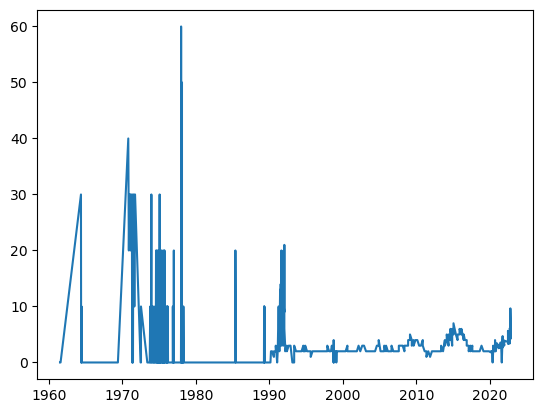

In [68]:
LA = county_df.loc[county_df["county_name"] == "Los Angeles"]
plt.plot(LA["sample_date"], LA["result"])

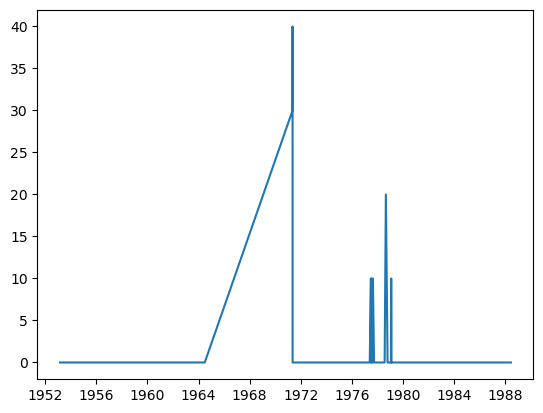

In [69]:
SD = county_df.loc[county_df["county_name"] == "San Diego"]
plt.plot(SD["sample_date"], SD["result"])

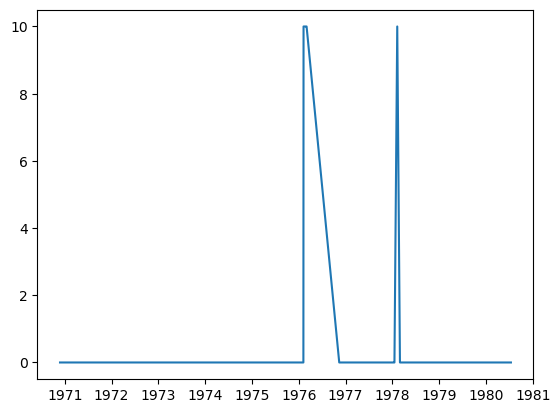

In [70]:
O = county_df.loc[county_df["county_name"] == "Orange"]
plt.plot(O["sample_date"], O["result"])

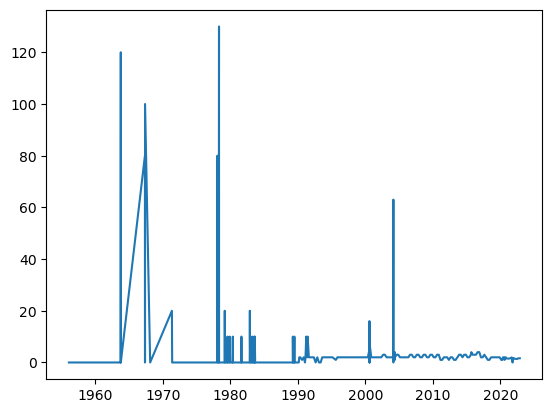

In [71]:
R = county_df.loc[county_df["county_name"] == "Riverside"]
plt.plot(R["sample_date"], R["result"])

In [72]:
# comments: LA and Riverside hige increases, especially LA
# Orange and SD spiked in 70s 

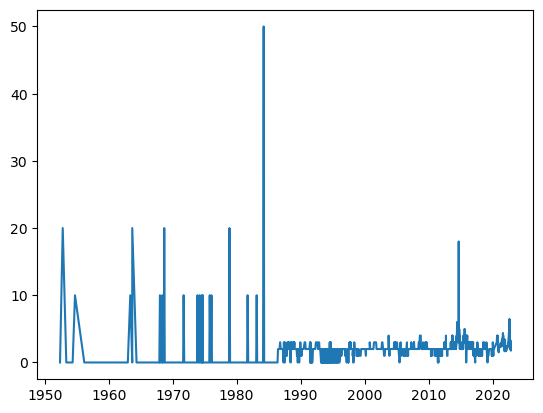

In [73]:
A = county_df.loc[county_df["county_name"] == "Alameda"]
plt.plot(A["sample_date"], A["result"])

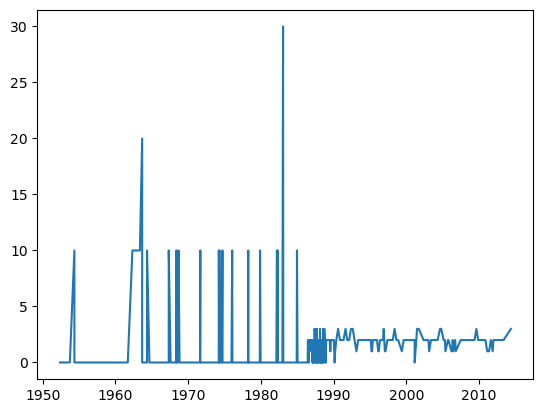

In [74]:
SC = county_df.loc[county_df["county_name"] == "Santa Clara"]
plt.plot(SC["sample_date"], SC["result"])

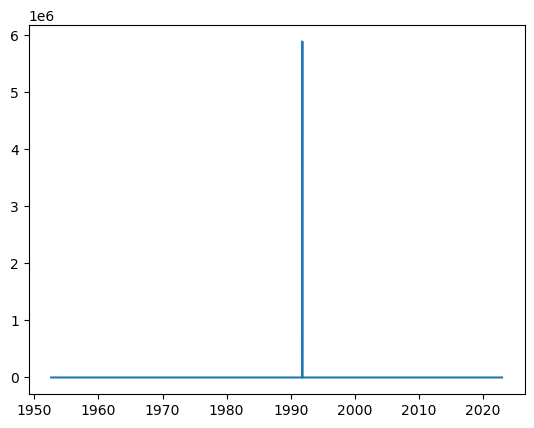

In [75]:
SAC = county_df.loc[county_df["county_name"] == "Sacramento"]
plt.plot(SAC["sample_date"], SAC["result"])

In [76]:
#Did three from norcal. super weird, no idea what to make of santa clara. but maybe notable 
#that theres a themepark there

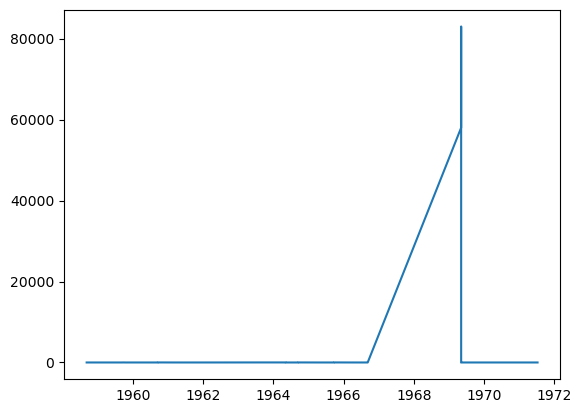

In [77]:
Al = county_df.loc[county_df["county_name"] == "Alpine"]
plt.plot(Al["sample_date"], Al["result"])

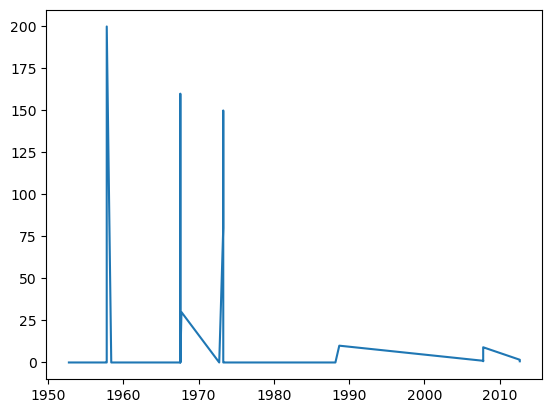

In [78]:
Si = county_df.loc[county_df["county_name"] == "Sierra"]
plt.plot(Si["sample_date"], Si["result"])

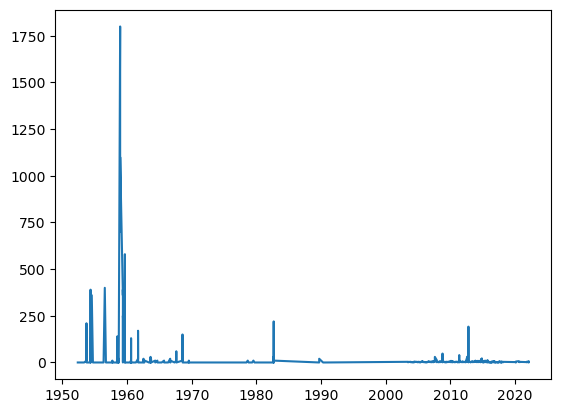

In [79]:
M = county_df.loc[county_df["county_name"] == "Modoc"]
plt.plot(M["sample_date"], M["result"])

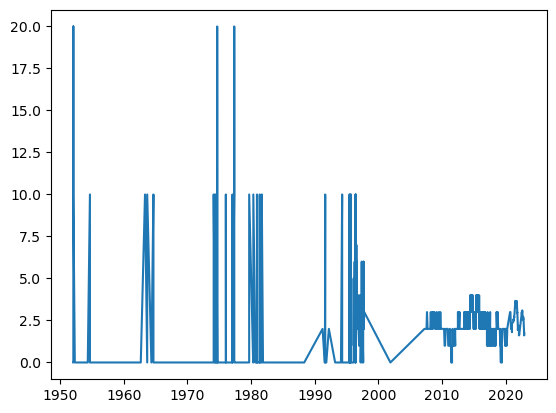

In [80]:
CC = county_df.loc[county_df["county_name"] == "Contra Costa"]
plt.plot(CC["sample_date"], CC["result"])


In [81]:
cc_df = county_df.loc[county_df["county_name"] == "Contra Costa"]

cc_unique = cc_df['station_id'].unique().size
cc_unique

95

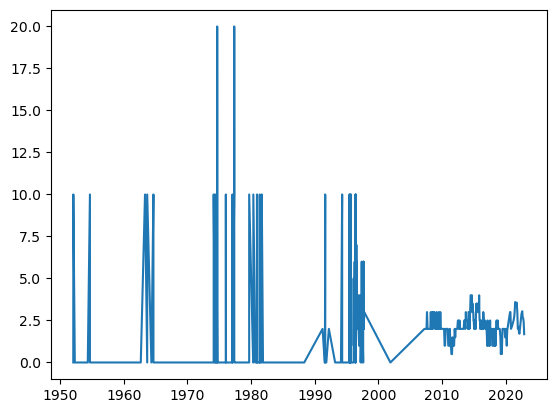

In [92]:
cc_avg = cc_df.groupby("sample_date").mean()["result"]

ccavdf = pd.DataFrame({"Contra Costa": cc_avg})
plt.plot(cc_avg)

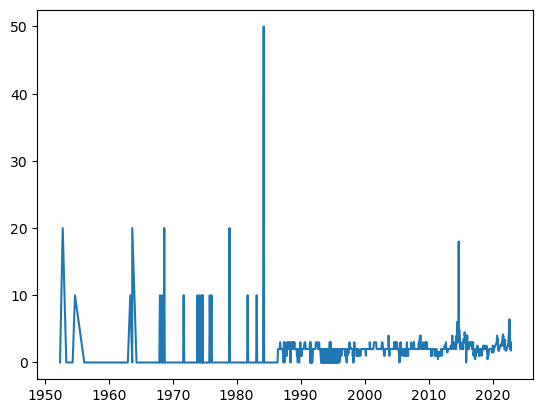

In [88]:
A_df = county_df.loc[county_df["county_name"] == "Alameda"]
A_avg = A_df.groupby("sample_date").mean()["result"]
Aavdf = pd.DataFrame({"Alameda": A_avg})
plt.plot(A_avg)

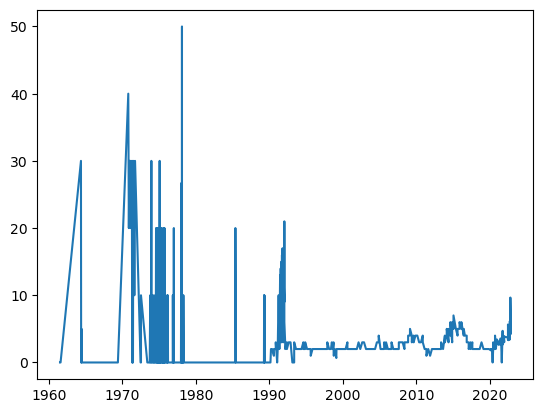

In [90]:
LA_df = county_df.loc[county_df["county_name"] == "Los Angeles"]
LA_avg = LA_df.groupby("sample_date").mean()["result"]
LA_avg
plt.plot(LA_avg)

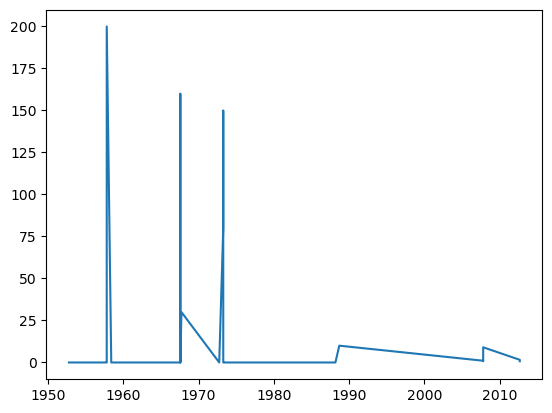

In [93]:
S_df = county_df.loc[county_df["county_name"] == "Sierra"]
S_avg = S_df.groupby("sample_date").mean()["result"]

plt.plot(S_avg)

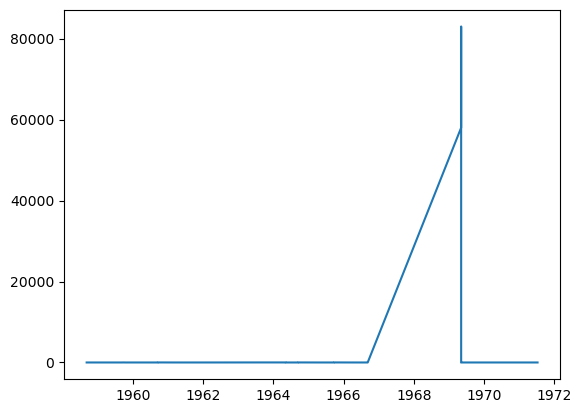

In [94]:
AL_df = county_df.loc[county_df["county_name"] == "Alpine"]
AL_avg = AL_df.groupby("sample_date").mean()["result"]

plt.plot(AL_avg)

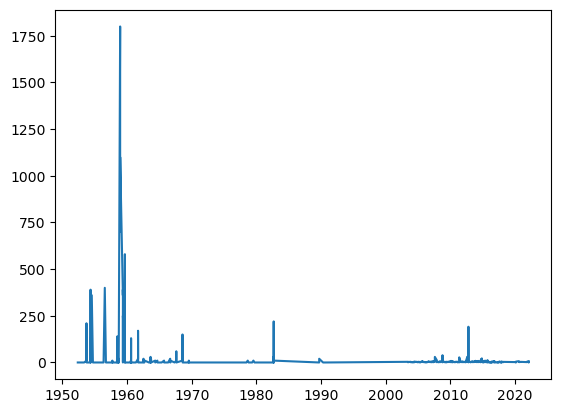

In [95]:
MO_df = county_df.loc[county_df["county_name"] == "Modoc"]
MO_avg = MO_df.groupby("sample_date").mean()["result"]

plt.plot(MO_avg)

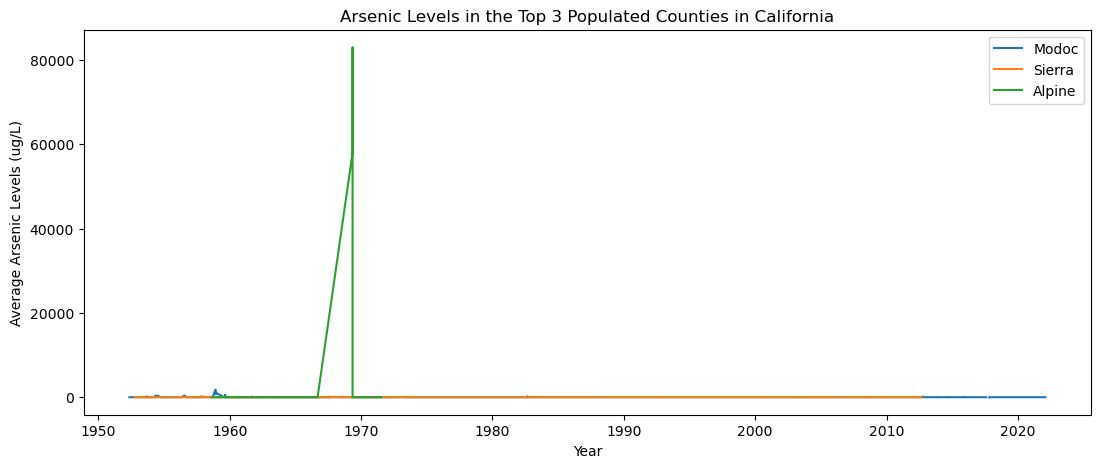

In [130]:
plt.figure(figsize=(13, 5)) 
plt.plot(MO_avg, label = "Modoc")
plt.plot(S_avg, label = "Sierra")
plt.plot(AL_avg, label = "Alpine")
plt.xlabel("Year")
plt.ylabel("Average Arsenic Levels (ug/L)")
plt.title("Arsenic Levels in the Top 3 Populated Counties in California")
plt.legend()
plt.show()


In [102]:
O_df = county_df.loc[county_df["county_name"] == "Orange"]
O_avg = O_df.groupby("sample_date").mean()["result"]
SD_df = county_df.loc[county_df["county_name"] == "San Diego"]
SD_avg = SD_df.groupby("sample_date").mean()["result"]

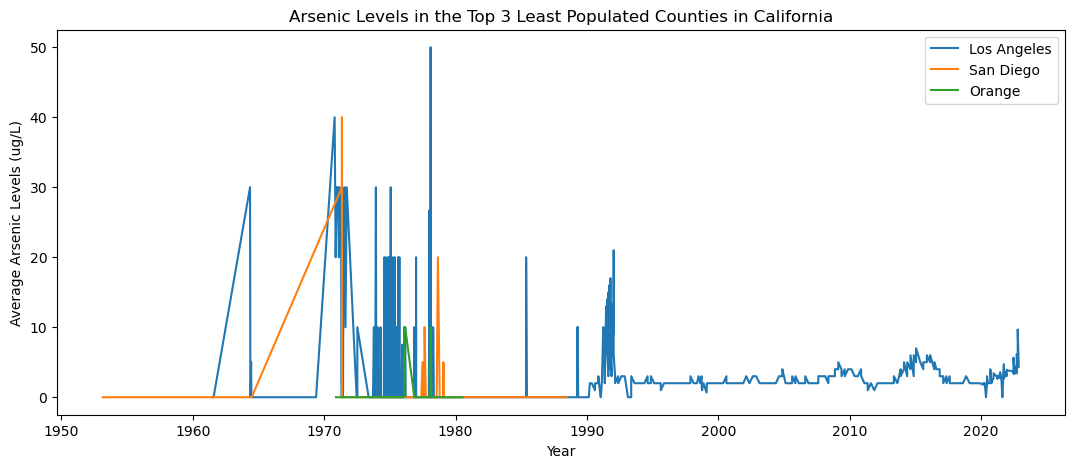

In [127]:
plt.figure(figsize=(13, 5))  
plt.plot(LA_avg, label = "Los Angeles")
plt.plot(SD_avg, label = "San Diego")
plt.plot(O_avg, label = "Orange")
plt.xlabel("Year")
plt.ylabel("Average Arsenic Levels (ug/L)")
plt.title("Arsenic Levels in the Top 3 Least Populated Counties in California")
plt.legend()
plt.show()

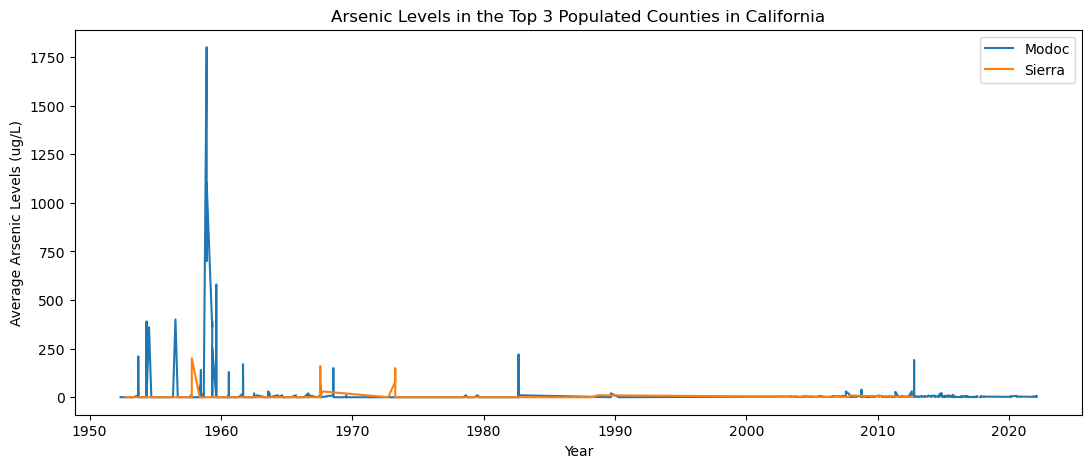

In [129]:
plt.figure(figsize=(13, 5)) 
plt.plot(MO_avg, label = "Modoc")

plt.plot(S_avg, label = "Sierra")
plt.xlabel("Year")
plt.ylabel("Average Arsenic Levels (ug/L)")
plt.title("Arsenic Levels in the Top 3 Populated Counties in California")
plt.legend()
plt.show()
